In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Seleciona, dentre os dados brutos, os dado de interesse para o objetivo do trabalho

In [ ]:
PATH = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(__name__))), "data/2025MAE121dados.xlsx")
dados_brutos = pd.read_excel(PATH, sheet_name="dados")
dados_brutos = dados_brutos[['Ident', 'Altura', 'Peso', 'Alimentação', 'Tempo_sono', 'Tempo_tela']]
dados_brutos.set_index('Ident', inplace=True)
dados_brutos.info()
dados_brutos
dados = pd.DataFrame([], index=dados_brutos.index)


<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Altura       118 non-null    int64  
 1   Peso         118 non-null    float64
 2   Alimentação  118 non-null    object 
 3   Tempo_sono   118 non-null    float64
 4   Tempo_tela   118 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.5+ KB


## Descricao e tratamento das variaveis

### Altura
Nenhum tratamento do dado foi necessario

In [17]:
# Tratamento (nenhum necessario)
dados['Altura'] =dados_brutos['Altura']
dados['Altura'].describe()

count    118.000000
mean     173.635593
std        8.541168
min      150.000000
25%      170.000000
50%      173.000000
75%      180.000000
max      196.000000
Name: Altura, dtype: float64

In [24]:
# Criar os intervalos de 10 cm
bins = range(dados['Altura'].min() // 10 * 10, dados['Altura'].max() // 10 * 10 + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Agrupar os dados em intervalos
tab_freq_altura = pd.cut(dados['Altura'], bins=bins, labels=labels, right=False)
tab_freq_altura = tab_freq_altura.value_counts().sort_index()
tab_freq_altura

Altura
150-159     5
160-169    21
170-179    61
180-189    26
Name: count, dtype: int64

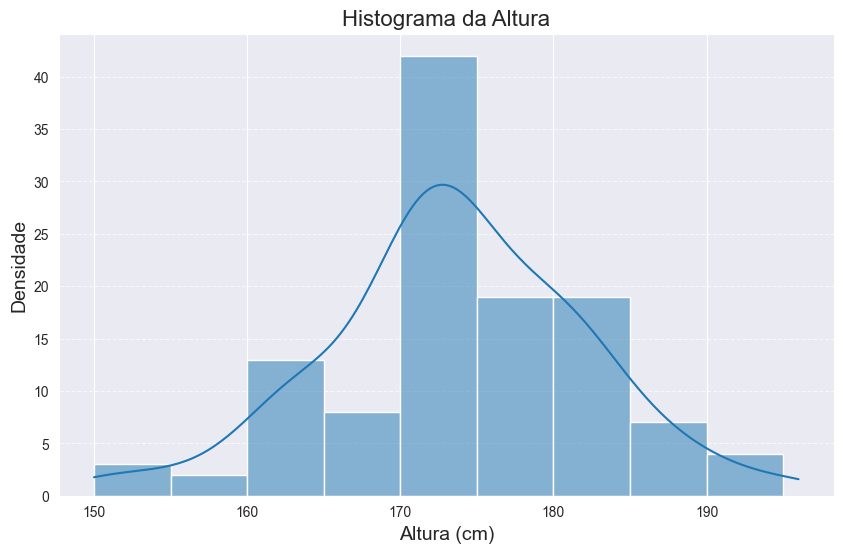

In [15]:
# Create a histogram with nice round bins
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['Altura'], bins=range(150, 200, 5), kde=True)

# Add labels and title
plt.title('Histograma da Altura', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Peso

In [ ]:
dados_brutos['Altura'].apply(lambda x: x.replace(',', '.')).astype(float)